In [1]:
%load_ext kamu
%import_dataset matches
%import_dataset player-scores
%import_dataset player-scores-total

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%sql -o scores
select * from `player-scores`
where name='KrabbyPattie'OR name='visper'OR name='ItIsIThomas'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

In [3]:
%%local
import numpy as np

import pandas as pd
import hvplot.pandas, holoviews as hv
name = scores["name"].isin(["KrabbyPattie"])
go = pd.DataFrame(
    data={'total goals': [np.sum(scores[name]["goals"])], "total points": [np.sum(scores[name]["score"])],
          "total shots": [np.sum(scores[name]["shots"])], "total saves": [np.sum(scores[name]["saves"])],
          "total assists": [np.sum(scores[name]["assists"])]})

p2 = hv.Layout(
    scores.hvplot.box("score", by="name", height=400, width=300, title="Players score distribution") + scores[
        name].hvplot.table(columns=["match_id", "score", "goals", "assists", "shots", "saves"], selectable=True,
                           width=500) + go.hvplot.table(width=400, height=100)).cols(2)
p2

:Layout
   .BoxWhisker.I :BoxWhisker   [name]   (score)
   .Table.I      :Table   [match_id,score,goals,assists,shots,saves]
   .Table.II     :Table   [total goals,total points,total shots,total saves,total assists]

In [4]:
%%sql -o df
select * 
from matches order by event_time desc limit 1

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

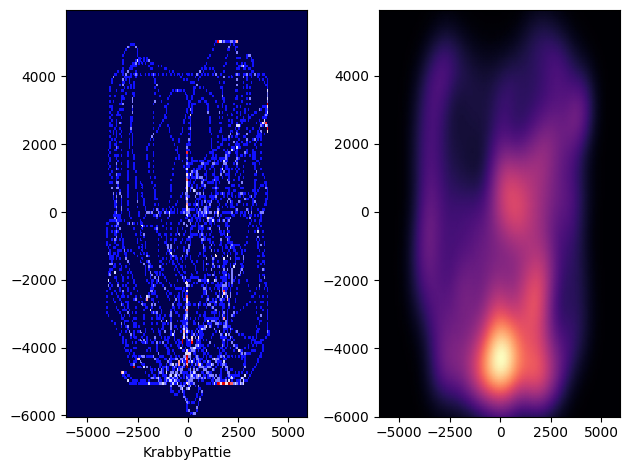

In [5]:
%%local
from classes.process import PreProcess, Video, Visualize

import json
# this script reads the RL replay file and parses it into a json(internally) using rattletrap
# afterwards the necessary data is extracted and then turned into a heatmap, displays the match in 2d; see specific explanation below
# the main player is the player from which the replay was grabbed

proc = PreProcess()
heat = Visualize()

#load the converted json file from dataset
queried_replay = json.loads(df.loc[0].replay_json)

#process the json for car/bal location and other required variables
car_positions = proc.get_paths(queried_replay)

#extract relevant data from the prior process into format we use for visualization
car_histories = proc.car_positions_to_histories(car_positions[0])

#grab var needed in other class
teamord,player_ids,player_nam,teamnr,vip = proc.get_var()

#turn data into heatmaps, stats etc..
visuals = heat.vis(car_histories,scores,teamord,player_ids)


Rendering 405 s match as 67.5 s clip (6.0 X speed) of 810 frames
Rendering took 127.38808989524841 s


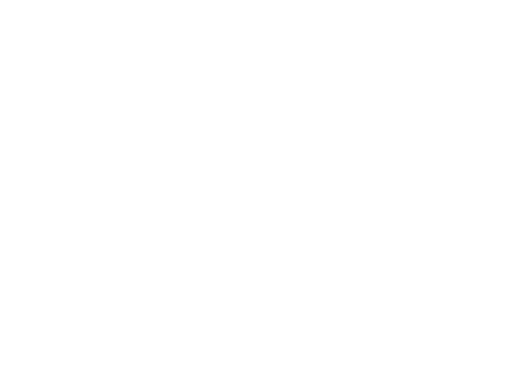

In [6]:
%%local 
html5 = Video(car_histories,player_nam,teamord,player_ids,vip,teamnr)
#turn data into a video for upload after event
video = html5.vis()